In [3]:
pip install fuzzy-c-means

In [34]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [35]:
n_samples = 5000

X = np.concatenate((
    np.random.normal((-6, -6), size=(n_samples, 2)),
    np.random.normal((6, 6), size=(n_samples, 2))
))

In [36]:
X

array([[-7.25923045, -6.0936634 ],
       [-5.48581312, -7.62459722],
       [-6.89923207, -5.91390391],
       ...,
       [ 6.5912423 ,  6.50333364],
       [ 5.47302227,  5.95572788],
       [ 7.34027078,  6.36020599]])

In [37]:
fcm = FCM(n_clusters=2)
fcm.fit(X)

In [43]:
fcm._FCM__predict(X)

DeviceArray([[4.8828893e-03, 9.9511707e-01],
             [9.0046255e-03, 9.9099535e-01],
             [2.6141631e-03, 9.9738580e-01],
             ...,
             [9.9807078e-01, 1.9292044e-03],
             [9.9902689e-01, 9.7307703e-04],
             [9.9413514e-01, 5.8648470e-03]], dtype=float32)

In [38]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

print(fcm_centers)
print(fcm_labels)

[[ 5.987774   6.008283 ]
 [-6.0053225 -6.0074873]]
[1 1 1 ... 0 0 0]


In [ ]:
fcm_centers

Buffer([[ 2.0216815,  2.027449 ],
        [-2.0445051, -2.0221655]], dtype=float32)

In [ ]:
fcm_labels

DeviceArray([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [10]:
fcm.partition_coefficient

DeviceArray(0.9863664, dtype=float32)

In [ ]:
fcm.predict(X)

DeviceArray([1, 1, 1, ..., 0, 0, 0], dtype=int32)

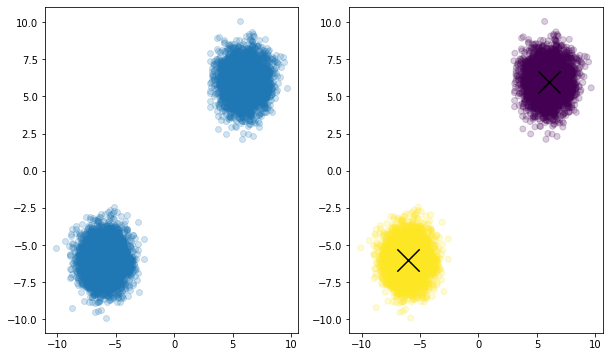

In [12]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(10,6))
axes[0].scatter(X[:,0], X[:,1], alpha=.2)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.2)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="x", s=500, c='k')
# plt.savefig('images/basic-clustering-output.jpg')
plt.show()

In [47]:
pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.2MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=a43fa5b3d3f15e39bd5e6ebbffd124dbdab362a8ae5da8f91a2e27f5db4be7a9
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [54]:
ncenters = 2

In [103]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X.T, 2, 2, error=0.005, maxiter=1000, init=None)

In [113]:
print(jm)

[455111.73487043 369655.27977635 360781.98642801 254951.874783
  28652.6298469   20016.75870875  20015.04148107]


In [105]:
print(cntr)
print(u)
print(u0)
print(d)
print(jm)
print(p)
print(fpc)

[[-6.00530594 -6.00747263]
 [ 5.98776001  6.00826935]]
[[9.95116967e-01 9.90995260e-01 9.97385744e-01 ... 1.92930509e-03
  9.73023137e-04 5.86499959e-03]
 [4.88303348e-03 9.00474019e-03 2.61425588e-03 ... 9.98070695e-01
  9.99026977e-01 9.94135000e-01]]
[[0.41509357 0.3334443  0.87290057 ... 0.7251047  0.57956593 0.66795254]
 [0.58490643 0.6665557  0.12709943 ... 0.2748953  0.42043407 0.33204746]]
[[ 1.25688325  1.6985184   0.89880978 ... 17.75368416 16.57920942
  18.19516124]
 [17.94267351 17.81847164 17.55598987 ...  0.78056359  0.51741235
   1.39754957]]
[455111.73487043 369655.27977635 360781.98642801 254951.874783
  28652.6298469   20016.75870875  20015.04148107]
7
0.9861148642235188


In [106]:
cluster_membership = np.argmax(u, axis=0)

In [107]:
cluster_membership

array([0, 0, 0, ..., 1, 1, 1])

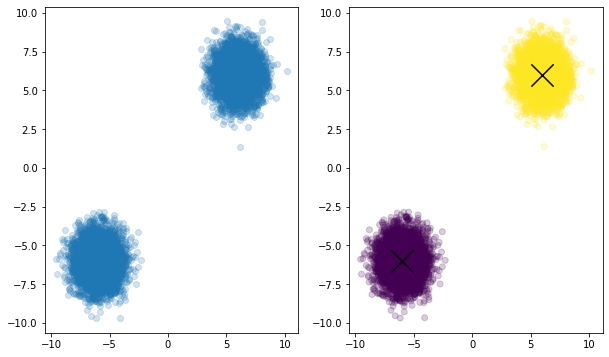

In [114]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(10,6))
axes[0].scatter(X[:,0], X[:,1], alpha=.2)
axes[1].scatter(X[:,0], X[:,1], c=cluster_membership, alpha=.2)
axes[1].scatter(cntr[:,0], cntr[:,1], marker="x", s=500, c='k')
# plt.savefig('output.jpg')
plt.show()